In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv('../data/original/data.csv')

In [14]:
numeric_features = data.dtypes[data.dtypes != 'int64'].index
categorical_features = data.dtypes[data.dtypes == 'int64'].index

In [15]:

positive_corr = data.corrwith(data["Bankrupt?"]).sort_values(ascending=False)[:7].index.tolist()
negative_corr = data.corrwith(data["Bankrupt?"]).sort_values()[:6].index.tolist()

<ipython-input-16-03552c7725e0>:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data[relation].corr(), dtype=np.bool))


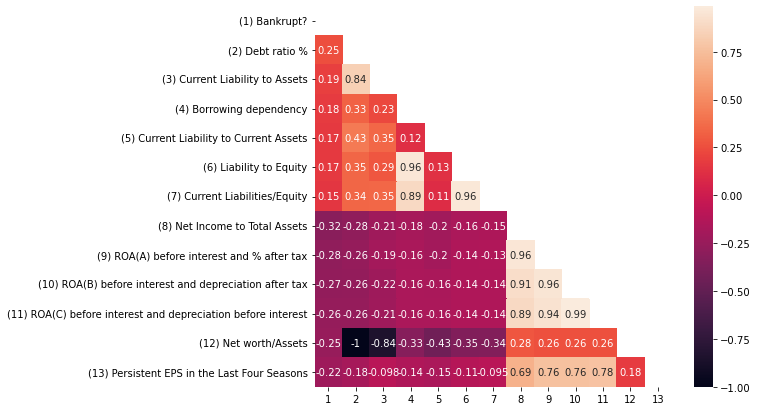

In [16]:
# relation = positive_corr.columns.tolist()[:-1] + negative_corr.columns.tolist()[:-1]
relation = positive_corr[:] + negative_corr[:]
plt.figure(figsize=(8,7))
my_y_axis_label = ['(1) Bankrupt?', '(2) Debt ratio %', '(3) Current Liability to Assets', '(4) Borrowing dependency', '(5) Current Liability to Current Assets', 
'(6) Liability to Equity', '(7) Current Liabilities/Equity', '(8) Net Income to Total Assets', 
'(9) ROA(A) before interest and % after tax', '(10) ROA(B) before interest and depreciation after tax', 
'(11) ROA(C) before interest and depreciation before interest', '(12) Net worth/Assets', '(13) Persistent EPS in the Last Four Seasons']

yticks = my_y_axis_label
xticks = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
# plt.ylabel(my_y_axis_label)
mask = np.triu(np.ones_like(data[relation].corr(), dtype=np.bool))
sns.heatmap(data[relation].corr(), yticklabels=yticks, xticklabels=xticks, annot=True, mask=mask)